In [1]:
Q1 = '''Train a single perceptron and SVM to learn an AND gate with two inputs x1 and x2. Assume that all the
weights of the perceptron are initialized as 0. Show the calulation for each step and also draw the decision
boundary for each updation.'''

<h1> S.V.M class</h1>

In [2]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 
from sklearn import svm
import time






style.use('ggplot')
class SVM:
    def __init__(self,visualise = True):
        # super().__init__()
        self.visualise = visualise 
        self.colors = {1:'r',-1:'b'}
        if self.visualise:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
        self.w = None 
        self.b = None


    def fit(self,data):
#         [[self.ax.scatter(x[0],x[1],s= 100,color = self.colors[i]) for x in data[i]] for i in data]
        self.data = data  
        # save all magnitudeas as key and fin the minimum one 
        opt_dict = {}

        transofrm = [[1,1],
                        [-1,1],
                        [-1,-1],
                        [1,-1] ]
        all_data = []
        for yi in self.data:
        # for yi in range(len(self.data)):
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
            
        # print(all_data)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

                        
        #extremely expensive
        b_range_multiple = 5
        # b_range_multiple = 2


        b_multiple = 5

        latest_optimum = self.max_feature_value * 10

        for step in step_sizes :
            w = np.array([latest_optimum,latest_optimum])
            #we can do this
            optimised = False 


            while not optimised:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transofrm:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            
                            #show lines of updation
#                             def hyperplane(x,w,b,v):
#                                 return (-w[0]*x-b+v) / w[1]

#                             datarange = (self.min_feature_value*0.9 , self.max_feature_value*1.1)

#                             hyp_x_min = datarange[0]
#                             hyp_x_max = datarange[1]


#                             #postive support vector
#                             psv1 = hyperplane(hyp_x_min,w_t,b,1)
#                             psv2 = hyperplane(hyp_x_max,w_t,b,1)
#                             self.ax1 = self.ax
#                             self.ax1.plot([hyp_x_min,hyp_x_max],[psv1,psv2],"k")


#                             #negative support vector
#                             nsv1 = hyperplane(hyp_x_min,w_t,b,-1)
#                             nsv2 = hyperplane(hyp_x_max,w_t,b,-1)
#                             self.ax1.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],"k")


#                             zer1 = hyperplane(hyp_x_min,w_t,b,0)
#                             zer2 = hyperplane(hyp_x_max,w_t,b,0)
#                             self.ax1.plot([hyp_x_min,hyp_x_max],[zer1,zer2])


#                             plt.show()
#                             time.sleep(2)
#                             print("Reached here")

                if w[0] < 0:
                    optimised = True
                    
                else:
                    w = w - step


            norms = sorted([n for n in opt_dict])

            opt_choice = opt_dict[norms[0]]

            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    


    def predict(self,features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualise:
            self.ax.scatter(features[0],features[1],s = 200,marker = '*', c = self.colors[classification])

        return classification

    def visualifucse(self,data_dick1):
        [[self.ax.scatter(x[0],x[1],s= 100,color = self.colors[i]) for x in data_dick1[i]] for i in data_dick1]

        # v = x.w+b 
        # psv = 1 
        # nsv = -1
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9 , self.max_feature_value*1.1)

        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]


        #postive support vector
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],"k")


        #negative support vector
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],"k")


        zer1 = hyperplane(hyp_x_min,self.w,self.b,0)
        zer2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[zer1,zer2])


        plt.show()


# data_dict = {-1:np.array([[1,7],
#                           [2,8],
#                           [3,8],]),
             
#              1:np.array([[5,1],
#                          [6,-1],
#                          [7,3],])}


data_di1 = { -1:np.array([[1,0],[0,0],[0,1]]),
                1:np.array([[1,1]])


}


# svmobj = SVM()
# svmobj.fit(data_di1)
# svmobj.visualifucse(data_di1)




<h3>Running S.V.M. object</h3>

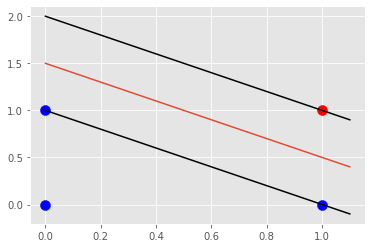

In [3]:

svmobj = SVM()
svmobj.fit(data_di1)
svmobj.visualifucse(data_di1)

In [4]:

#visualisation of plot

In [5]:
from sklearn import svm
#just matching the result

In [6]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0,0,0, 1]
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y)

SVC(kernel='linear')

In [7]:
clf.support_

array([1, 2, 3])

In [8]:
clf.coef_

array([[0.5, 0.5]])

In [9]:
svmobj.w

array([2., 2.])

In [10]:
clf.intercept_

array([-1.5])

In [11]:
svmobj.b

-3.0000000000000426

In [12]:
########PERCEPTRON#######

<h1>
THIS IMPLEMENTATION USES a(k+1 ) = a(k)-n(k)*∂Jr(a)<br>
gradient calcualtion is required a(k)-n(k)*∂Jr(a)<br>
learning rate is kept = 0.01
</h1>



<h1>
 Jr = (1/2)(sum(ay-b)^2)/(|y|^2)
    </h1>

<h1>
ALL IMPLEMENTATION OF GRADIENT DESCENT IS THROUGH M.S.E (Minumum Square Error)
</h1>

In [13]:
a1_1 = np.array([[1,2],[3,4],[5,6]])

In [14]:
a2_1 = np.array([[1,2,3],[4,5,6]])

In [15]:
a1_1.shape

(3, 2)

In [16]:
a2_1.shape

(2, 3)

In [17]:
np.dot(a2_1,a1_1)

array([[22, 28],
       [49, 64]])

<h1>Perceptron</h1>

In [18]:
import random

In [19]:
# def visualifucse(self,data_dick1):
#     [[self.ax.scatter(x[0],x[1],s= 100,color = self.colors[i]) for x in data_dick1[i]] for i in data_dick1]

#     # v = x.w+b 
#     # psv = 1 
#     # nsv = -1
#     def hyperplane(x,w,b,v):
#         return (-w[0]*x-b+v) / w[1]

#     datarange = (self.min_feature_value*0.9 , self.max_feature_value*1.1)

#     hyp_x_min = datarange[0]
#     hyp_x_max = datarange[1]


#     #postive support vector
#     psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
#     psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
#     self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],"k")


#     #negative support vector
#     nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
#     nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
#     self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],"k")


#     zer1 = hyperplane(hyp_x_min,self.w,self.b,0)
#     zer2 = hyperplane(hyp_x_max,self.w,self.b,0)
#     self.ax.plot([hyp_x_min,hyp_x_max],[zer1,zer2])


#     plt.show()


In [20]:
#used for creatinf single dimension array from multidim
def flatten(seq):
  for el in seq:
    if isinstance(el, list):
      yield from flatten(el)
    else:
      yield el

<h3>Perceptron</h3>

In [21]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 


style.use('ggplot')

class PerceptronManual(object):
    def __init__(self,traindata,random1 = True,*args):

#         self.colors = {1:'r',-1:'b'}
        intial_weight = 0.0
        self.nptraindata = np.array(traindata)
        self.weights = [intial_weight for i in range(len(traindata[0]))]
        self.traindata = traindata
        if random1 == False:
            self.weights = [random.randint(1,100) for i in range(len(traindata[0]))]
#             self.a = args[0]
#             self.b = args[1]
#             print(self.a)
#             print(self.b)

        #visualise
       
            
        
        
        pass

    
    def initdraw(self,data1):
        get_label = np.unique([i[-1] for i in data1])
        self.colors= {}
        if len(get_label)!=2:
            self.visualise = None#if two categories
        else:
            self.colors[get_label[0]] = 'r'
            self.colors[get_label[1]] = 'b'
            
            pass 
        if self.visualise is not None:
            xaxis = list(self.nptraindata[:,0])
            yaxis = list(self.nptraindata[:,1])
            label1 = list(self.nptraindata[:,2])
#             if data1:
#             print(xaxis)
#             print(yaxis)
#             print(self.colors)
            for ivar in range(len(label1)):
                self.ax.scatter(xaxis[ivar],yaxis[ivar],s = 200,marker = '*', c = self.colors[label1[ivar]])
                pass
            
        pass 
        

    def predict(self,data1,weightstemp):
        activation  = weightstemp[0]
        for i in range(len(data1)-1):
            activation += weightstemp[i+1]*data1[i]

               
            
            
        return 1.0 if activation>=0 else 0.0
        pass 

        
    def train_weights(self,l_rate,n_epoch):#tain data,learning data,epochs
#         intial_weight = 0.0
#         weights = [intial_weight for i in range(len(train[0]))]
        for epocvar in range(n_epoch):
            sum_error_var =  0.0
            for row in self.traindata:
                prediction = self.predict(row,self.weights)
                error_pre = row[-1]-prediction
                sum_error_var+=error_pre**2
                self.weights[0] = self.weights[0] + l_rate*error_pre
                for ivar in range(len(row)-1):
                    self.weights[ivar+1] = self.weights[ivar+1] +(l_rate*error_pre*row[ivar])


            print("->Epoch = {:d},learning_rate = {:.3f},error = {:.3f}".format(epocvar,l_rate,sum_error_var))
            print("Weights ",self.weights)
        return self.weights 
        
    def done(self,weightstemp):
        self.visualise = None
        if len(self.traindata[0])==3:
            self.visualise = True
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            self.initdraw(self.traindata)
         #plt line
        data1 = self.traindata
        if self.visualise is not None and len(weightstemp)==3:
            max_feature_value = (max(flatten(data1)))*1.1
            min_feature_value = (min(flatten(data1)))*0.9
            def hyperplane(x,w,b,v):
                return (-w[0]*x-b+v) / w[1]
            zer1 = hyperplane(min_feature_value,weightstemp[1:],weightstemp[0],0)
            zer2 = hyperplane(max_feature_value,weightstemp[1:],weightstemp[0],0)
            self.ax.plot([min_feature_value,max_feature_value],[zer1,zer2])
            plt.show()
            pass

In [22]:
datasetforand = [[0.0,0.0,0],[1.0,0.0,0],[0.0,1.0,0],[1.0,1.0,1]]

In [23]:
# object of perceptron
obkect = PerceptronManual(datasetforand)


In [24]:
#training
finalweights = obkect.train_weights(0.01,12)

->Epoch = 0,learning_rate = 0.010,error = 2.000
Weights  [0.0, 0.01, 0.01]
->Epoch = 1,learning_rate = 0.010,error = 3.000
Weights  [-0.01, 0.01, 0.02]
->Epoch = 2,learning_rate = 0.010,error = 3.000
Weights  [-0.019999999999999997, 0.01, 0.02]
->Epoch = 3,learning_rate = 0.010,error = 2.000
Weights  [-0.019999999999999997, 0.02, 0.02]
->Epoch = 4,learning_rate = 0.010,error = 1.000
Weights  [-0.03, 0.01, 0.02]
->Epoch = 5,learning_rate = 0.010,error = 0.000
Weights  [-0.03, 0.01, 0.02]
->Epoch = 6,learning_rate = 0.010,error = 0.000
Weights  [-0.03, 0.01, 0.02]
->Epoch = 7,learning_rate = 0.010,error = 0.000
Weights  [-0.03, 0.01, 0.02]
->Epoch = 8,learning_rate = 0.010,error = 0.000
Weights  [-0.03, 0.01, 0.02]
->Epoch = 9,learning_rate = 0.010,error = 0.000
Weights  [-0.03, 0.01, 0.02]
->Epoch = 10,learning_rate = 0.010,error = 0.000
Weights  [-0.03, 0.01, 0.02]
->Epoch = 11,learning_rate = 0.010,error = 0.000
Weights  [-0.03, 0.01, 0.02]


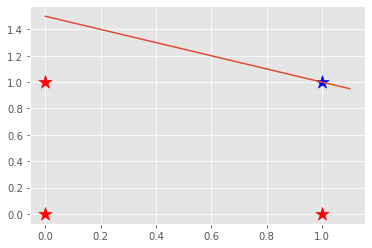

In [25]:
obkect.done(obkect.weights)

In [26]:
#comparision of data
for row in datasetforand:
    prediction = obkect.predict(row, finalweights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
